# LDA by user

Each vector is a distinct post. Predictions would be performed on single new posts to determine individual probability of belonging to a cluster. 

Code adapted from 
- General Assembly Lesson by Caroline Schmitt: Intro to Latent Dirichlet Allocation. 
- Tutorial from Machine Learning Plus by Selva Prabhakaran https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(42)

## Import preprocessed data

In [2]:
df = pd.read_csv('data/posts_by_users_sample.csv')

In [3]:
df.sample(10, random_state=42)

,username,body
235574,Sharaldoll3,It s on Twitter too
293112,emoji911,Now this is an interesting coincident NY and N...
235546,Shanwid34,I just joined Parler! Looking forward to meeti...
148267,LadyJarhead,"UNHINGED NUTJOB. Way to go, MI. Hey crazy lady..."
153011,Lgrey526364838852,The Pandemic is a Perfect Excuse to Impose Gre...
131313,Jpropst0731,Have faith. The storm is here and it will get ...
140659,KennethBrooks1911,Don't tread on me. Or anyone else. #donttr...
245084,Stacyl1024,Done...thanks so much for the tip I love it!!
73436,Douglasadamiani,His whole performance was to drop sound bites....
69701,Divadiver808,Paco taco


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313862 entries, 0 to 313861
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   username  313862 non-null  object
 1   body      313862 non-null  object
dtypes: object(2)
memory usage: 4.8+ MB


## Train test split

In [4]:
X = df['body']

In [5]:
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

In [6]:
X_train.shape

(282475,)

## Count Vectorize: Bigrams

In [7]:
default_words = list(CountVectorizer(stop_words='english').get_stop_words())
my_additions = ['ve', 're', 'll', 'just', 'like', 'don']
custom_stopwords = default_words + my_additions 

In [8]:
cv = CountVectorizer(min_df = 5, 
                     max_df = .5,
                     stop_words = custom_stopwords, 
                     ngram_range = (2, 2), 
                )
cv.fit(X_train)

cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)
cv_df = pd.DataFrame(cv_train.todense(), columns=cv.get_feature_names_out())
cv_df.head(2)

,00 00,00 dollars,00 eastern,00 est,00 gallon,00 hour,00 month,00 morning,00 pm,00 time,...,zuckerberg jack,zuckerberg money,zuckerberg needs,zuckerberg paid,zuckerberg soros,às ruas,ódio bem,últimos 30,últimos anos,único que
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


cv = CountVectorizer(min_df = 5, 
                     max_df = .5,
                     stop_words = custom_stopwords, 
                     ngram_range = (1, 1), 
                )
                
                
full dataset size = 2 rows × 116534 columns

10% dataset 2 rows × 188772 columns

In [14]:
cv_df.columns[1000:1050]

Index(['2020 longer', '2020 look', '2020 looks', '2020 lord', '2020 love',
       '2020 maga', '2020 make', '2020 man', '2020 mask', '2020 merry',
       '2020 need', '2020 needs', '2020 new', '2020 news', '2020 obama',
       '2020 oh', '2020 pa', '2020 parler', '2020 patriot', '2020 patriots',
       '2020 pence', '2020 people', '2020 perfect', '2020 plan', '2020 point',
       '2020 police', '2020 political', '2020 pray', '2020 president',
       '2020 presidential', '2020 pretty', '2020 proven', '2020 race',
       '2020 real', '2020 really', '2020 reason', '2020 red',
       '2020 republican', '2020 right', '2020 rip', '2020 rnc', '2020 said',
       '2020 save', '2020 say', '2020 sign', '2020 signs', '2020 silent',
       '2020 sorry', '2020 stand', '2020 start'],
      dtype='object')

## Fit LDA model

In [15]:
lda_8 = LatentDirichletAllocation(n_components=8, 
                                random_state=42
                               )
lda_8.fit(cv_train)

LatentDirichletAllocation(n_components=8, random_state=42)

In [9]:
def display_topics(model, feature_names, num_words):
    for ix, topic in enumerate(model.components_):
        print(f'Topic {ix}:')
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print('\n'.join(words))
        print()


In [10]:
features = cv.get_feature_names_out()

In [20]:
display_topics(lda_8, features, 15)

Topic 0:
looking forward
joined parler
parler looking
forward meeting
trump2020 trump2020
meeting newuser
echo echo
amen amen
great news
stay strong
yes sir
good work
great idea
agree 100
trump rapist

Topic 1:
fox news
president trump
news apps
explore fox
apps right
social media
donald trump
blah blah
joe biden
year old
yes yes
years ago
new york
news justice
wear mask

Topic 2:
president trump
god bless
united states
lives matter
donald trump
trump supporters
black lives
thank god
term limits
american people
trump president
white house
new york
make sure
president donald

Topic 3:
god bless
merry christmas
piece shit
bless america
good morning
happy thanksgiving
download app
united states
app read
read free
president trump
new year
totally agree
civil war
long time

Topic 4:
president trump
joe biden
supreme court
election fraud
covid 19
voter fraud
fake news
white house
hunter biden
donald trump
trump won
civil war
new york
united states
president elect

Topic 5:
president trump
am

In [11]:
def plot_top_words(model, width, height, figsize, feature_names, n_top_words, title):
    fig, axes = plt.subplots(width, height, figsize=figsize, sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelbottom=True, labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

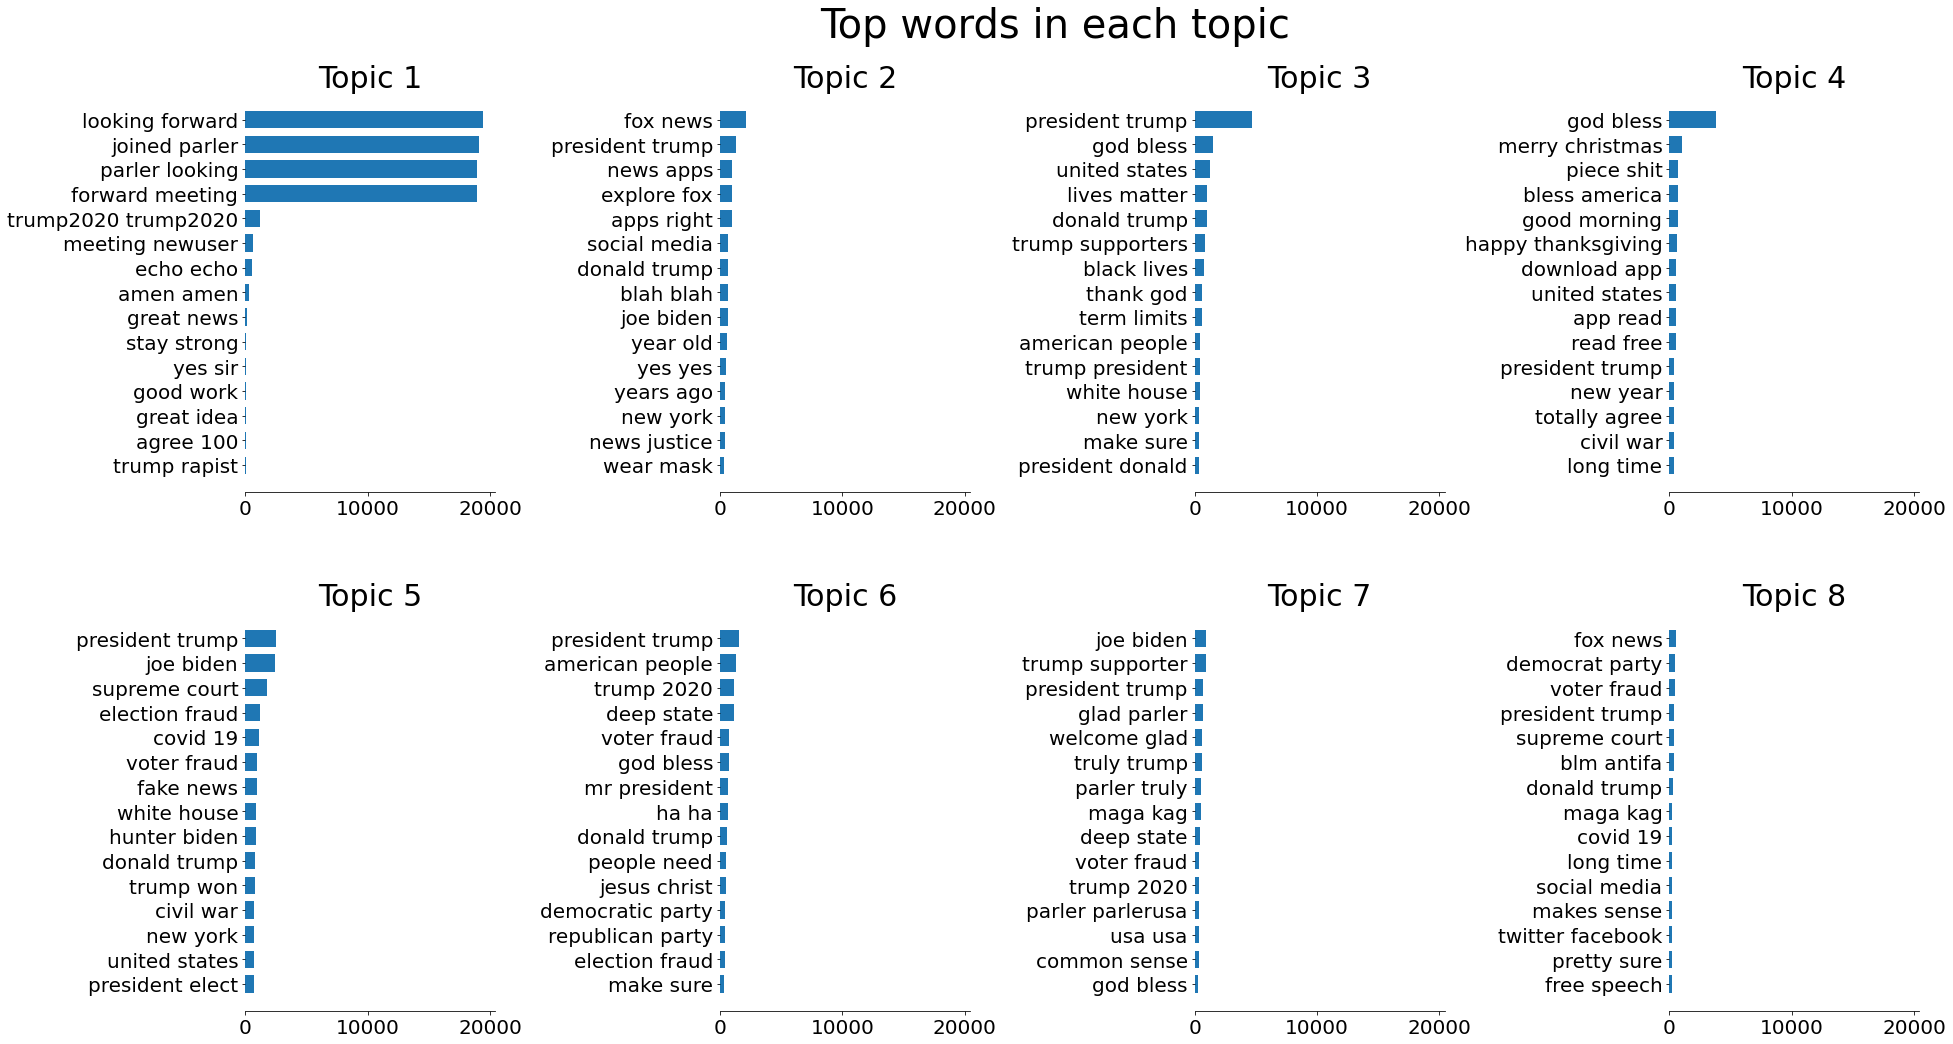

In [57]:
plot_top_words(lda_8, 2, 4, (30, 15), features, 15, 'Top words in each topic')

In [12]:
lda_14 = LatentDirichletAllocation(n_components=14, 
                                random_state=42
                               )
lda_14.fit(cv_train)

LatentDirichletAllocation(n_components=14, random_state=42)

In [13]:
display_topics(lda_14, features, 15) # new run 

Topic 0:
looking forward
joined parler
parler looking
forward meeting
trump2020 trump2020
meeting newuser
echo echo
amen amen
great news
watch broadcast
great idea
good work
new platform
19 20
check link

Topic 1:
fox news
news apps
explore fox
apps right
president trump
joe biden
year old
hunter biden
news justice
donald trump
social media
white house
new york
covid 19
nancy pelosi

Topic 2:
lives matter
united states
president trump
black lives
term limits
trump supporters
donald trump
joe biden
echo echo
god bless
thank god
american people
states america
trump president
social media

Topic 3:
god bless
merry christmas
download app
good morning
app read
read free
united states
piece shit
new year
happy new
president trump
hell yeah
joe biden
bless america
donald trump

Topic 4:
joe biden
supreme court
president trump
covid 19
election fraud
hunter biden
president elect
united states
white house
new york
civil war
big tech
electoral college
donald trump
voter fraud

Topic 5:
american 

In [22]:
display_topics(lda_14, features, 15)

Topic 0:
looking forward
joined parler
parler looking
forward meeting
trump2020 trump2020
meeting newuser
echo echo
amen amen
great news
watch broadcast
great idea
good work
new platform
19 20
check link

Topic 1:
fox news
news apps
explore fox
apps right
president trump
joe biden
year old
hunter biden
news justice
donald trump
social media
white house
new york
covid 19
nancy pelosi

Topic 2:
lives matter
united states
president trump
black lives
term limits
trump supporters
donald trump
joe biden
echo echo
god bless
thank god
american people
states america
trump president
social media

Topic 3:
god bless
merry christmas
download app
good morning
app read
read free
united states
piece shit
new year
happy new
president trump
hell yeah
joe biden
bless america
donald trump

Topic 4:
joe biden
supreme court
president trump
covid 19
election fraud
hunter biden
president elect
united states
white house
new york
civil war
big tech
electoral college
donald trump
voter fraud

Topic 5:
american 

In [15]:
features = cv.get_feature_names_out()

In [14]:
log_topic = pd.DataFrame(lda_14.exp_dirichlet_component_, columns=features)

In [17]:
log_topic.to_csv('data/log_topic_lda14.csv', index=False)

In [ ]:
log_topic.append(df[['username']])

In [11]:
lda_14.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 14,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 42,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [68]:
lda_14.score(cv_train), lda_14.score(cv_test) # approximate log-likelihood score 

(-27564976.118788257, -4300279.457585275)

In [66]:
lda_14.perplexity(cv_train)

90257.0065426344

In [67]:
lda_14.perplexity(cv_test)

22361217.87012258

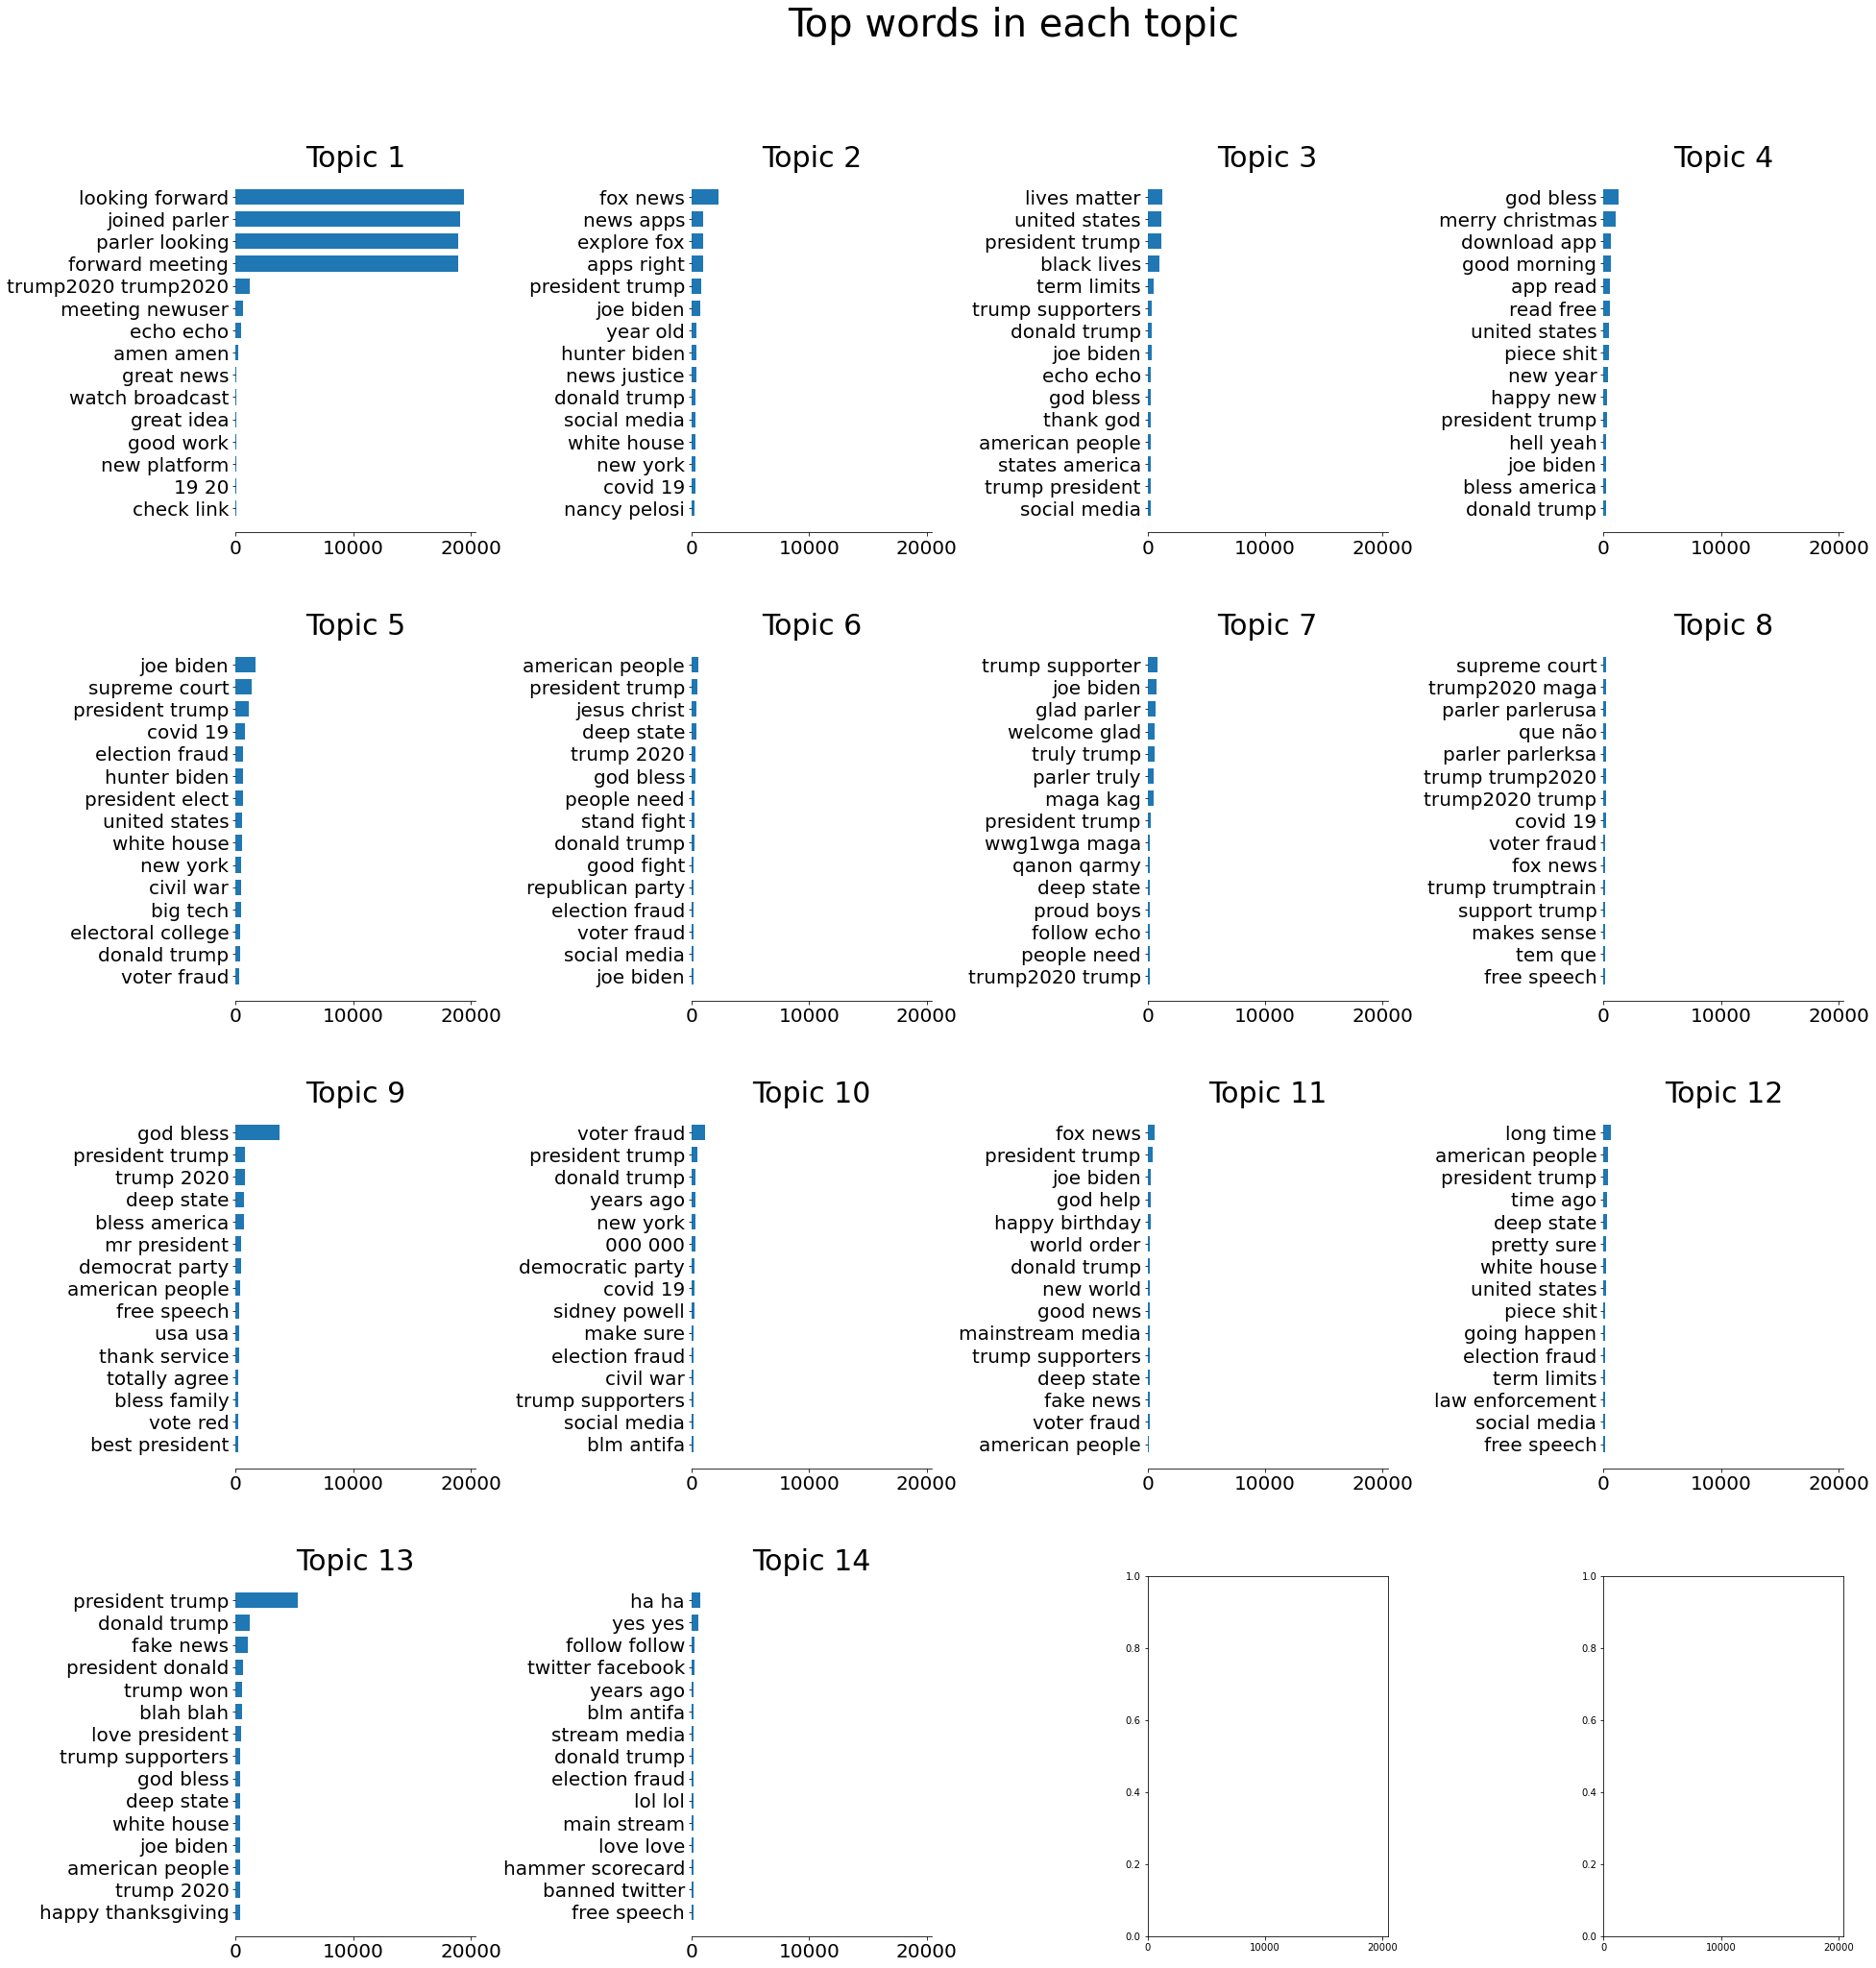

In [58]:
plot_top_words(lda_14, 4, 4, (30, 30), features, 15, 'Top words in each topic')

In [23]:
lda_25 = LatentDirichletAllocation(n_components=25, 
                                random_state=42
                               )
lda_25.fit(cv_train)

LatentDirichletAllocation(n_components=25, random_state=42)

In [24]:
len(lda_25.components_)

25

In [25]:
display_topics(lda_25, features, 15)

Topic 0:
looking forward
joined parler
parler looking
forward meeting
trump2020 trump2020
meeting newuser
amen amen
thank looking
trump veto
forward seeing
sorry loss
veto stimulus
conservative movement
election laws
nail head

Topic 1:
fox news
news apps
explore fox
apps right
joe biden
president trump
hunter biden
covid 19
new york
news justice
year old
white house
donald trump
tucker carlson
justice freedom

Topic 2:
united states
president trump
joe biden
president united
stop steal
trump supporters
social media
new york
states america
election fraud
lives matter
click link
black lives
make sure
donald trump

Topic 3:
merry christmas
good morning
new year
piece shit
happy new
god bless
hell yeah
united states
joe biden
president trump
course did
civil war
deep state
hope right
fight fight

Topic 4:
joe biden
president elect
supreme court
president trump
hunter biden
civil war
covid 19
white house
electoral college
election fraud
new york
veto veto
ted cruz
big tech
biden president


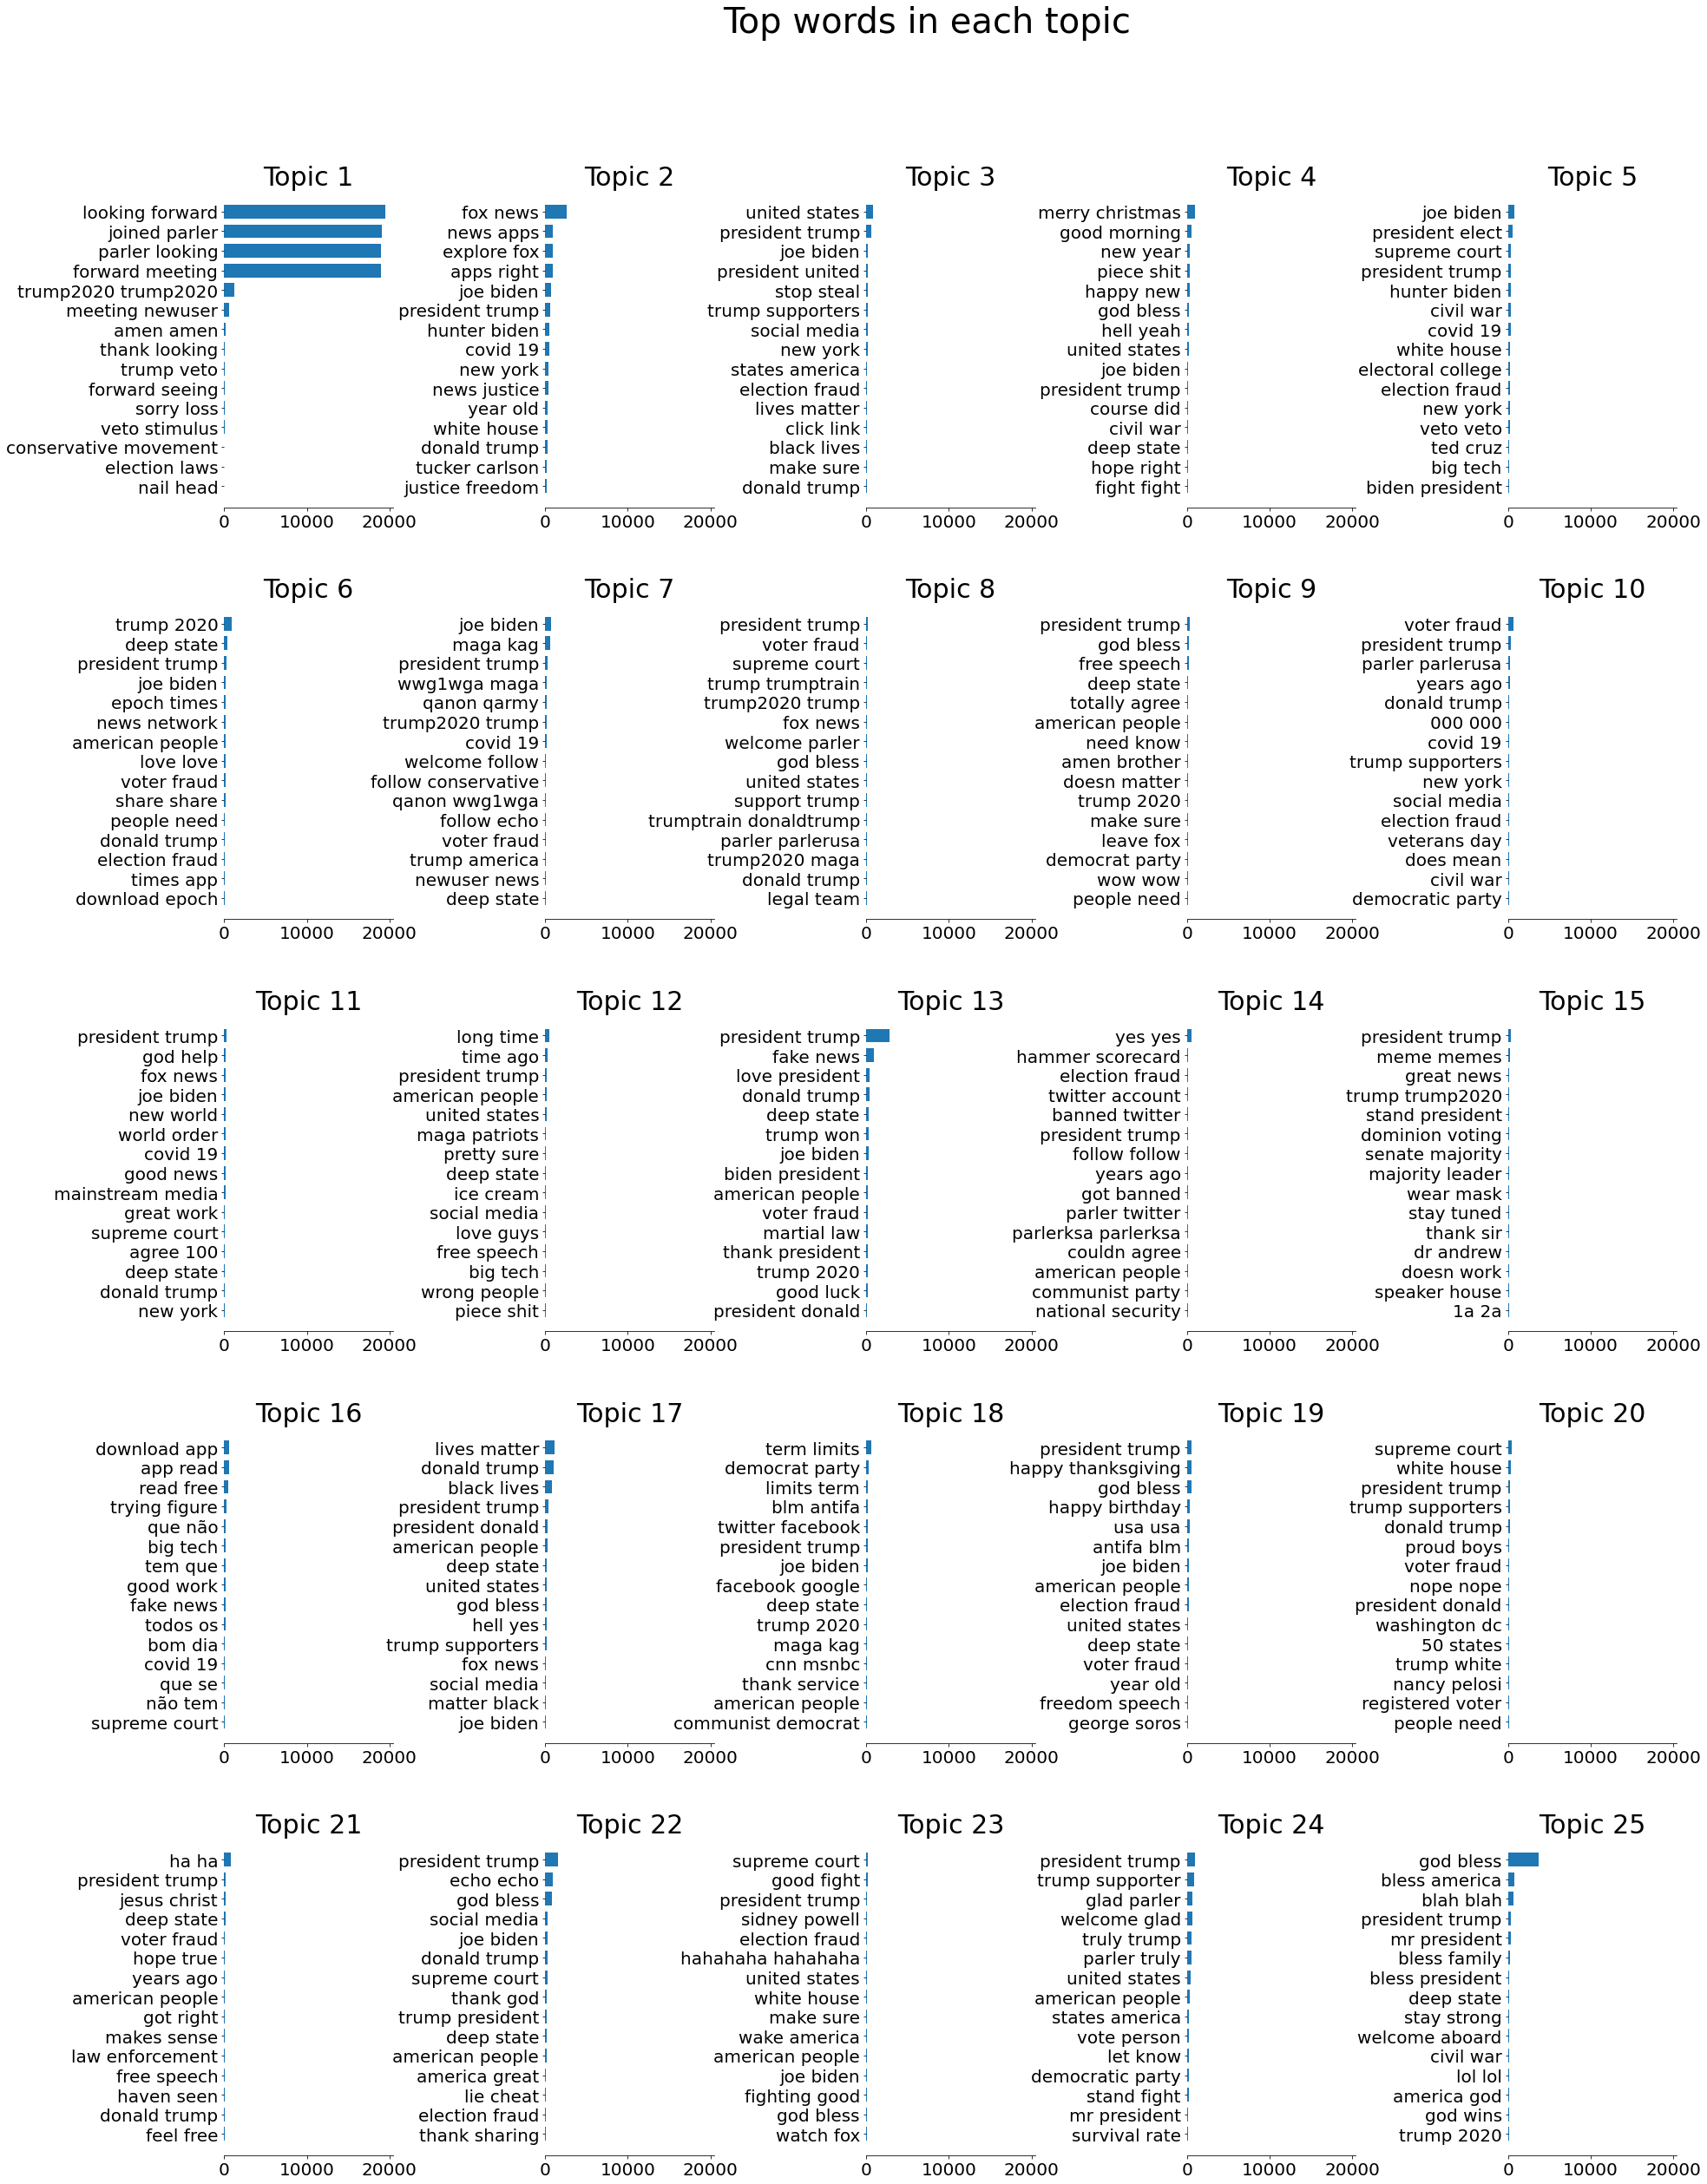

In [55]:
plot_top_words(lda_25, 5, 5, (30, 37), features, 15, 'Top words in each topic')

## Examine words in topics

In [ ]:
plt.barh()

In [43]:
lda_25.components_[5]

array([2.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04])

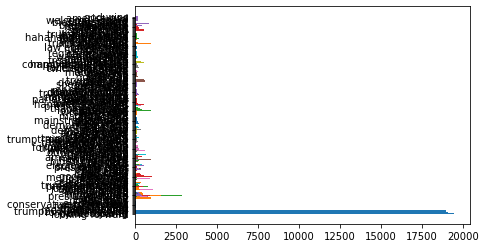

In [41]:
for topic_idx, topic in enumerate(lda_25.components_):
        n_top_words = 15
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [features[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        plt.barh(top_features, weights)

        # ax = axes[topic_idx]
        # plt.barh(top_features, weights, height=0.7)
        # plt.title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        # plt.invert_yaxis()
        # plt.tick_params(axis="both", which="major", labelsize=20)